In [2]:
#   x   x   x   x   x   x   x   x   x
#   x   x           x           x   x
#   x       x       x       x       x
#   x           x   x   x           x
#   x   x   x   x   x   x   x   x   x
#   x           x   x   x           x
#   x       x       x       x       x
#   x   x           x           x   x
#   x   x   x   x   x   x   x   x   x

from model.Case import TYPE_CASE, Case

ROWS = 9
COLS = 9

themes = [('🟥', 1), ('🟦', 2), ('🟨', 3), ('🟪', 4), ('🟩', 5), ('🟧', 6)]
camemberts = [('🍓', 1), ('💙', 2), ('💛', 3), ('💜', 4), ('💚', 5), ('🧡', 6)]

next_pos_possible = [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1)]

cases = []

def find_walkable_cases(position, walkable_cases = [], next_position = 0):
    n = next_pos_possible[next_position]
    case = cases[position[0]][position[1]]
    next_position_id = next_position + 1
    
    if next_position_id  >= len(next_pos_possible):
        return walkable_cases
    
    try:
        row = position[0] + n[0]
        col = position[1] + n[1]
        if row >= 0 and col >= 0:
            next_case = cases[row][col]
            if next_case.type_case < 4:
                if case.on_diagonale == next_case.on_diagonale == True:
                    walkable_cases.append(next_case)
                elif case.on_diagonale == next_case.on_diagonale == False:
                    walkable_cases.append(next_case)
                elif case.type_case == 1 or case.type_case == 3:
                    walkable_cases.append(next_case)
            
        find_walkable_cases(position, walkable_cases, next_position_id)
    except:
        find_walkable_cases(position, walkable_cases, next_position_id)

    return walkable_cases

def setup():
    i = 0
    for row in range(ROWS):
        rowItems = []
        if i == len(themes) - 1:
            i = 0
            
        for col in range(COLS):
            if ((col == row == 0) or
                (col == COLS // 2 and row == 0) or
                (col == COLS - 1 and row == 0) or  
                
                (row == ROWS - 1 and col == 0) or
                (row == ROWS - 1 and col == COLS // 2) or
                (row == ROWS - 1 and col == COLS - 1)):
                    item = camemberts.pop()
                    c = Case(TYPE_CASE['gain'], item[1], item[0])
                    if ((col == row == 0) or (col == COLS - 1 and row == 0) 
                        or (row == ROWS - 1 and col == 0) or (row == ROWS - 1 and col == COLS - 1)):
                        c.on_diagonale = True
                    rowItems.append(c)
                
            elif col == 0: # Première colonne
                rowItems.append(Case(TYPE_CASE['theme'], themes[i][1], themes[i][0]))
            elif row == 0 or row == ROWS // 2: # Première ligne et ligne du milieu
                rowItems.append(Case(TYPE_CASE['theme'], themes[i][1], themes[i][0]))
            elif row == ROWS - 1: # Dernière ligne
                rowItems.append(Case(TYPE_CASE['theme'], themes[i][1], themes[i][0]))
            elif col == COLS - 1 or col == COLS // 2: # Dernière colonne et colonne du milieu
                rowItems.append(Case(TYPE_CASE['theme'], themes[i][1], themes[i][0]))
            elif col == row or (col + row) + 1 == ROWS: # Diagonales
                c = Case(TYPE_CASE['theme'], themes[i][1], themes[i][0])
                c.on_diagonale = True
                rowItems.append(c)
            else:
                rowItems.append(Case( TYPE_CASE['null'])) 
                
            if row == ROWS // 2 and col == COLS // 2:
                rowItems[len(rowItems) - 1].type_case = TYPE_CASE['start']
                
            i += 1
            if i == len(themes) - 1:
                i = 0
                
        cases.append(rowItems)
        
def render():
    setup()
    graf = ''
    for row in cases:
        for item in row:
            graf = f'{graf}{item.graf}'
        graf = f'{graf}\r\n'
    
    print(graf)
    # cases[4][0].set_walkable_cases(find_walkable_cases((4, 0), []))
    # cases[4][0].walkable_cases_toString()
render()

TypeError: Case.__init__() takes from 1 to 4 positional arguments but 5 were given

Case: 1 0
0 None
Case: 1 0
7 None
Case: 1 0
14 None
Case: 1 0
21 None
Case: 1 0
28 None
Case: 1 0
35 None


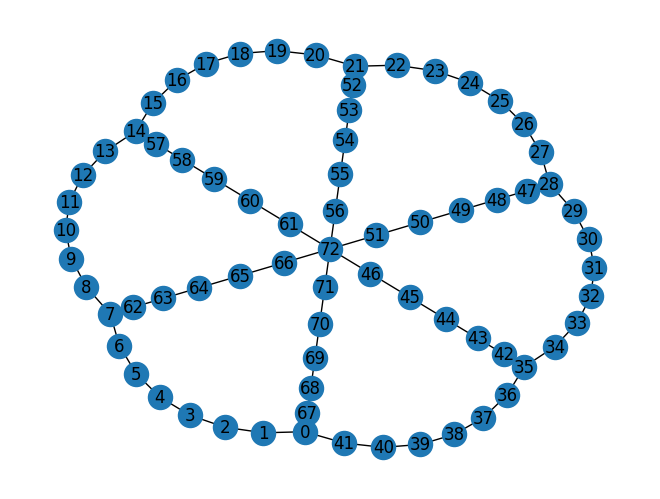

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from model.Case import TYPE_CASE, Case

# Listing neighbors
# for node in G.nodes():
#     print(f"Node {node} has neighbors: {list(G.neighbors(node))}")
G = nx.Graph()

def create():
    node_cercles = 42
    node_rayons = 4
    nb_rayons = 6
    
    # create circle
    for i in range(node_cercles):
        type = 0
        if i % (nb_rayons + 1) == 0:
            type = 1
        G.add_node(i, **{'case': Case(type_case=type)})
        
    for i in range(node_cercles):
        G.add_edge(i, (i + 1) % node_cercles)
        
    # create rayons 
    last_nodes_rayon = []
    first_nodes_rayon = []
    for nb_rayon in range(nb_rayons):
        start = G.number_of_nodes()

        for i in range(node_rayons):
            G.add_node(start + i)
        for i in range(node_rayons):
            G.add_edge(start + i, (start + i + 1))
        
        first_nodes_rayon.append(list(G.nodes)[start])
        last_nodes_rayon.append(list(G.nodes)[-1])

    # create and connect central node to rayon
    G.add_node(G.number_of_nodes())
    central = list(G.nodes)[-1]
    for last_node_rayon in last_nodes_rayon:
        G.add_edge(central, last_node_rayon)
        
    # connect rayons to circle
    for i in range(node_cercles):
        if i % (nb_rayons + 1) == 0:
            print(i, G.nodes[i]['case'].toString())
            G.add_edge(i, first_nodes_rayon.pop())

create()
nx.draw_spectral(G, with_labels=True)
plt.show()
    


Case: 0 ('🟩', 5)
None


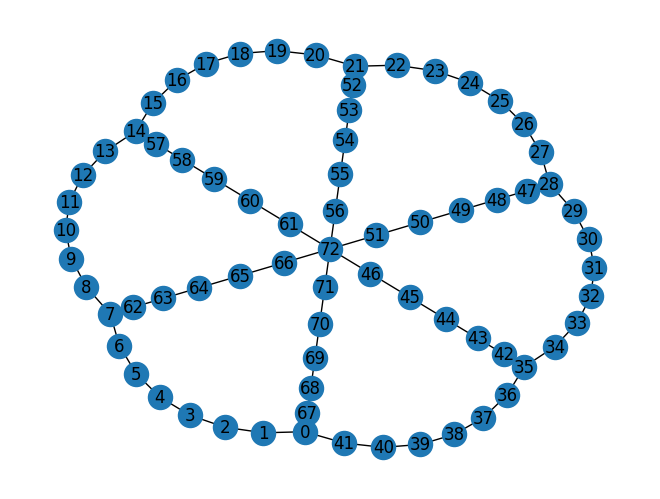

In [1]:
from model.Plateau import Plateau

import matplotlib.pyplot as plt
import networkx as nx

plateau = Plateau()
nx.draw_spectral(plateau.G, with_labels=True)

print(plateau.get_case(19).toString())